In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline  
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
import os

In [2]:
#Changing working directory
os.chdir('C:\\Users\\rakbansal\\Desktop\\Datasets\\Bike sharing')

In [3]:
#Defining Column Names and reading in the file
columns= ['instant', 'date','season', 'year', 'month', 'hour','holiday', 'weekday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
hours= pd.read_csv("hour.csv")
hours.columns= columns
hours.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
#Let's check the shape and other attributes of the dataset
hours.describe()

,instant,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
#Let's check the shape
hours.shape

(17379, 17)

In [6]:
#Check if the data has any nulls
hours.isnull().sum()

instant       0
date          0
season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

No nulls here! Let's begin exploring the variables now.

(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

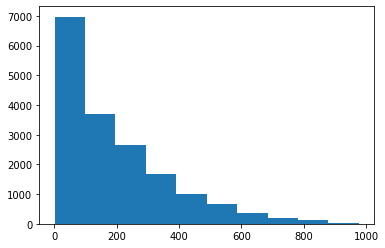

In [7]:
#Let's check the distribution of the dependent variable- Count
plt.hist(hours['count'])

It doesn't look normally distributed and has a right skew/positive skew. We can modify it later during the variable transformation phase.

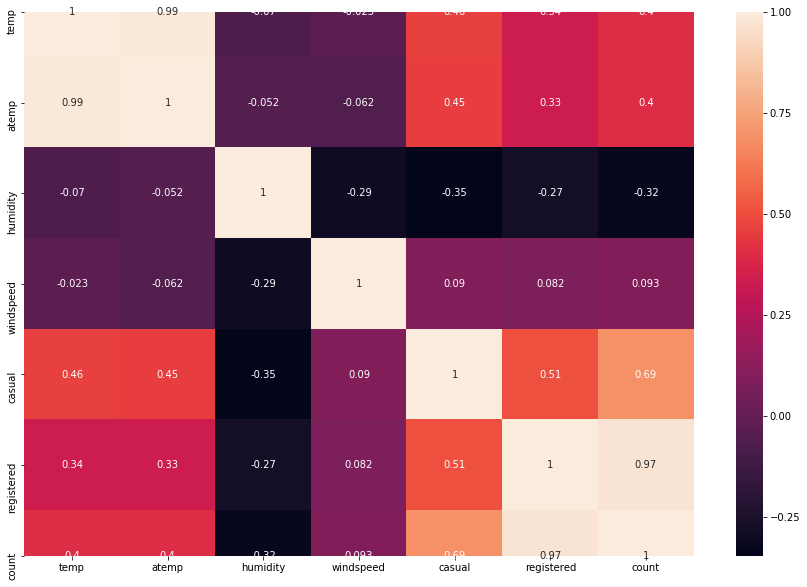

In [8]:
#Let's see how other numerical variables are related to the count variable
num_features= hours[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']]
plt.figure(figsize=(15,10))
correlation= num_features.corr()
sns.heatmap(correlation, annot= True)
plt.show();

Casual and Registred users do appear to have high correlation to the dependent 'count' variable but that is because count is a summation of both these categories. So, we will ignore this relationship.
Another thing to note here is the high correlation between 'temp' and 'atemp' which can introduce multicollinearity in the model. Therefore, we will only consider one varible 'temp' in the model.

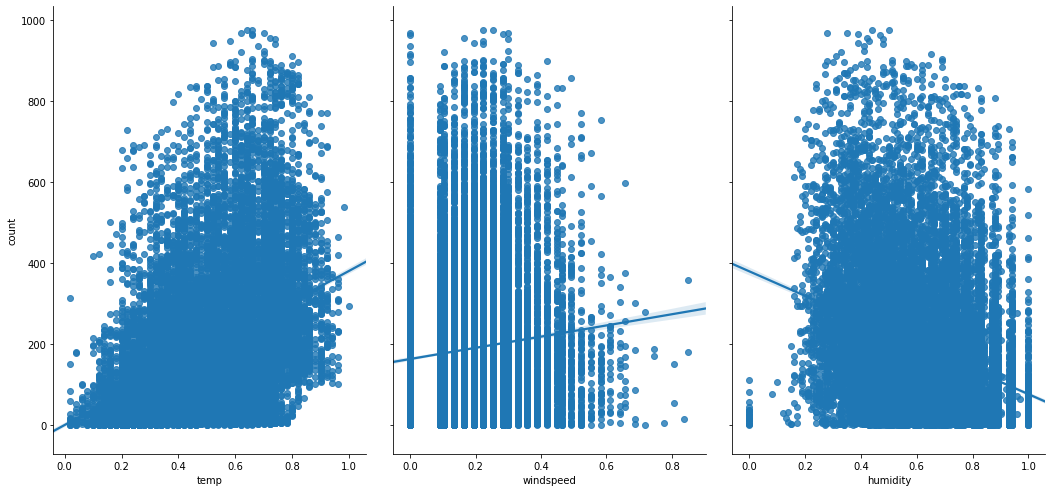

In [9]:
#Let's see the distribution visually
sns.pairplot(num_features, x_vars= ['temp', 'windspeed', 'humidity'], y_vars= 'count', height= 7, aspect=0.7, kind= 'reg')

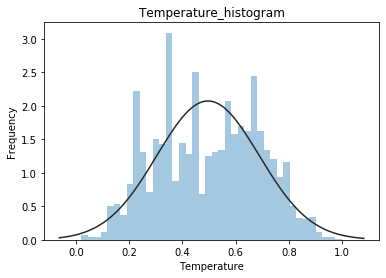

In [10]:
#Let's take a look at their distributions individually and check if they are normally distributed
#Checking for normality of num features
temp= num_features[['temp']]
sns.distplot(temp, kde=False, fit=stats.gamma)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title("Temperature_histogram")
plt.show()

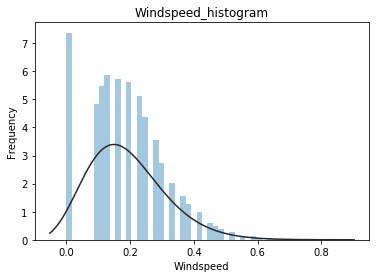

In [11]:
windspeed= num_features[['windspeed']]
sns.distplot(windspeed, kde=False, fit=stats.gamma)
plt.xlabel('Windspeed')
plt.ylabel('Frequency')
plt.title("Windspeed_histogram")
plt.show()


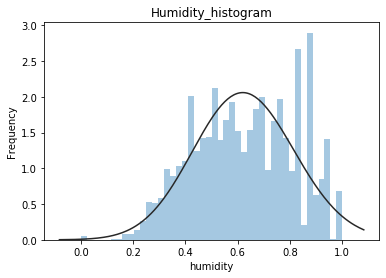

In [12]:
humidity= num_features[['humidity']]
sns.distplot(humidity, kde=False, fit=stats.gamma)
plt.xlabel('humidity')
plt.ylabel('Frequency')
plt.title("Humidity_histogram")
plt.show()


Windspeed and humidity do have a certain degree of skewness to right and left. We will have to transform these variables before including them in the model.

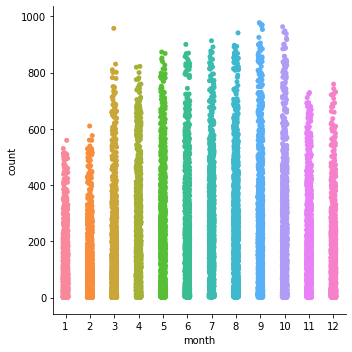

In [13]:
#Time to move to categorical variables now
sns.catplot(x='month', y= 'count',data= hours)

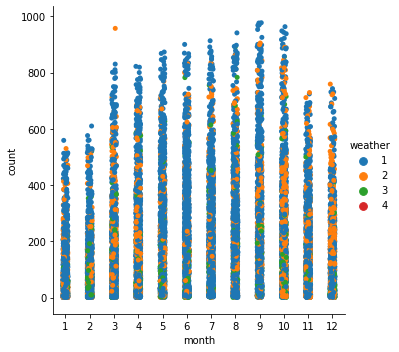

In [14]:
sns.catplot(x='month', y= 'count', hue= 'weather', data= hours)

As expected, weather-1 or clear days see maximum usage of bike rentals.

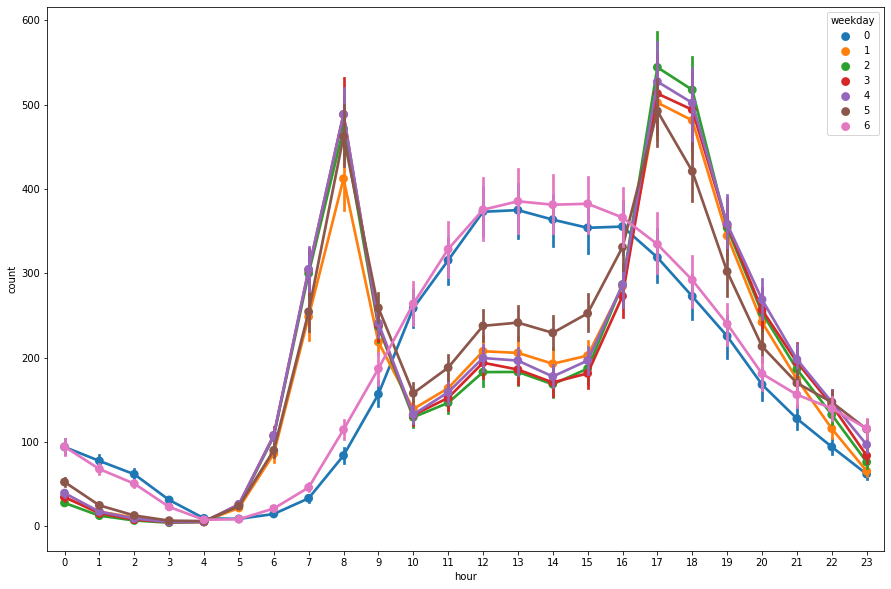

In [15]:
plt.figure(figsize=(15,10))
sns.pointplot(x= 'hour', y= 'count', hue= 'weekday', join= True, data= hours)
plt.show()

Two things can be observed from this chart:
1. Bike rentals peak during 6-8 am and 4-7 pm on weekdays which can be attributed to those being office commute hours.
2. The weekends see demand rise during afternoon hours which is when people go out.

Now that basic exploration is completed, let's take a look at outliers and see if we have any!

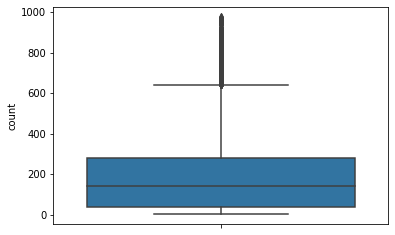

In [16]:
#Box-Plot for Count variable
sns.boxplot(data=hours,y="count")

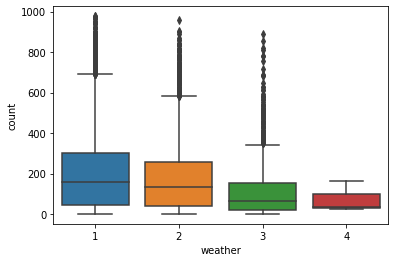

In [17]:
#Box-Plot for weather
sns.boxplot(data=hours,y="count",x="weather")


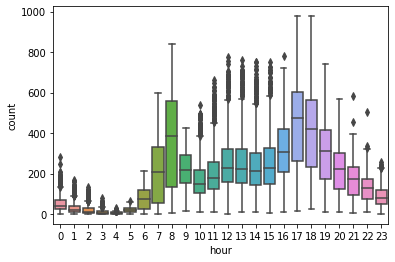

In [18]:
#Box-plot for hours
sns.boxplot(data=hours,y="count",x="hour")

It looks like there are plenty of outliers that lie beyond the Inter-Quartlie Rangle (IQR). We will remove them using the IQR method i.e. any observation lying outside 1.5*IQR will be treated as an outlier and removed from the final dataset.

Let's first modify the dataset a bit and convert categorical variables into actual categories as well as get rid of integer 0 and 1 values in them.

In [19]:
#Filling in values for relevant features: all other featutes are already in the form of dummies
#or will not be used in the model due to multicollinearity.
hours['season']= hours.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
hours['weather']= hours.weather.map({1: "Clear and Cloudy",\
                                        2 : "Mist and Cloudy", \
                                        3 : "Light Snow and rain, thunderstrom", \
                                        4 :"Heavy Rain and thunderstrom and ice pallets " })
hours.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,1,0,0,6,0,Clear and Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,1,0,6,0,Clear and Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,1,2,0,6,0,Clear and Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,1,3,0,6,0,Clear and Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,1,4,0,6,0,Clear and Cloudy,0.24,0.2879,0.75,0.0,0,1,1


In [20]:
#Now coerce the remaining categories into factors
cat_features= ["hour","weekday","month","season","weather","holiday","workingday"]
hours_modified= hours.astype({'hour': 'category', 'weekday': 'category', 'month': 'category', 'season': 'category', 'weather': 'category', 'holiday':'category', 'workingday':'category'})


In [21]:
#Let's check the data types of these variables now
hours_modified.dtypes

instant          int64
date            object
season        category
year             int64
month         category
hour          category
holiday       category
weekday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity       float64
windspeed      float64
casual           int64
registered       int64
count            int64
dtype: object

In [22]:
#standardize the numerical features as they are in different units, have outliers and skewed distributions
#Getting column names
num_features= hours[['temp', 'humidity', 'windspeed', 'count']]

#Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
scaled_df = scaler.fit_transform(num_features)
scaled_df = pd.DataFrame(scaled_df, columns= ['Temp_s', 'Humidity_s', 'Windspeed_s', 'Count_s'])


In [23]:
#Finally join them all and make a single DF
hours_new= hours_modified[['hour','workingday', 'weather', 'season']]
training= pd.concat([hours_new, scaled_df], axis=1)
training.head()

,hour,workingday,weather,season,Temp_s,Humidity_s,Windspeed_s,Count_s
0,0,0,Clear and Cloudy,Spring,-1.334648,0.947372,-1.553889,-0.956339
1,1,0,Clear and Cloudy,Spring,-1.438516,0.895539,-1.553889,-0.824022
2,2,0,Clear and Cloudy,Spring,-1.438516,0.895539,-1.553889,-0.868128
3,3,0,Clear and Cloudy,Spring,-1.334648,0.636370,-1.553889,-0.972879
4,4,0,Clear and Cloudy,Spring,-1.334648,0.636370,-1.553889,-1.039037


Time to get rid of outliers from the standardized dataset. As mentioned earlier, we will be using the Inter-quartile Range. Another, option is to use standard deviation as a cut-off point and remove observations that lie above/below 3*SD.

In [24]:
#Define 25th and 75th percentile.
q25 = training.Count_s.quantile(0.25)
q75 = training.Count_s.quantile(0.75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the cutoff point
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in training.Count_s if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
#Removing outliers
outliers_removed = training.loc[(training.Count_s >= lower) & (training.Count_s <= upper)] 
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=-0.824, 75th=0.505, IQR=1.329
Identified outliers: 505
Non-outlier observations: 16874


In [25]:
training_df= pd.get_dummies(outliers_removed)
training_df.shape

(16874, 38)

This completes Data exploration and data preparation and start with training the dataset.
Here's what we will be performing:
1. OLS Regression with Scikit Learn
2. Linear Regression with Cross Validation
3. OLS Regression with Statsmodel for better clarity
4. Regularization with the help of Ridge Regresion
5. Regression with Random Forest.

For all techniques, we will be judging the quality of the model based on Root Mean Square Error(RMSE).

In [26]:
#divide data into features (X) and target variable(y)
X= training_df.drop(['Count_s'], axis=1)
y= training_df['Count_s'] 

#Splitting into train and test- 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.3)

#Print their shapes
print("shape of training data:", X_train.shape, "\nShape of test data:", X_test.shape, "\nShape of training label:", y_train.shape, "\nShape of test label:", y_test.shape)

shape of training data: (11811, 37) 
Shape of test data: (5063, 37) 
Shape of training label: (11811,) 
Shape of test label: (5063,)


Let's try a basic Linear Regression and see how it performs.

In [27]:
#Running the reg- import the library
from sklearn.linear_model import LinearRegression

#instantiate the model
linreg= LinearRegression()

#Fit the model
model= linreg.fit(X_train, y_train)


In [28]:
#Let's predict on the test set
y_pred= linreg.predict(X_test)

In [29]:
#Take a look at basic parameters like Coefficients, R-squared and errors
print ('The intercept is:',linreg.intercept_ , '\nThe coeff values are:', linreg.coef_)

The intercept is: -4268458437573.1934 
The coeff values are: [ 2.52206857e-01 -8.81525713e-02 -3.18195264e-02  7.21967793e+10
  7.21967793e+10  7.21967793e+10  7.21967793e+10  7.21967793e+10
  7.21967793e+10  7.21967793e+10  7.21967793e+10  7.21967793e+10
  7.21967793e+10  7.21967793e+10  7.21967793e+10  7.21967793e+10
  7.21967793e+10  7.21967793e+10  7.21967793e+10  7.21967793e+10
  7.21967793e+10  7.21967793e+10  7.21967793e+10  7.21967793e+10
  7.21967793e+10  7.21967793e+10  7.21967793e+10  3.88777631e+12
  3.88777631e+12 -1.42361754e+11 -1.42361754e+11 -1.42361754e+11
 -1.42361754e+11  4.50847106e+11  4.50847106e+11  4.50847106e+11
  4.50847106e+11]


In [30]:
#MAE- Mean Absolute Error: Mean of absolute value of errors. Simplest metric to check quality of a model
print (metrics.mean_absolute_error(y_test, y_pred))

0.3982578821809484


In [31]:
#MSE- Mean Squared Error: Mean of squared errors. It's a bit harder to interpret than MAE
print (metrics.mean_squared_error(y_test, y_pred))

0.2855755379718704


In [32]:
#RMSE: Root MSE. Same as MSE but easier to interpret as it's in terms of Y. It also minimizes large errors.
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.5343926814355436


In [33]:
#R squared- how much of variance is explained by this model
linreg.score(X,y)

0.6254504832242752

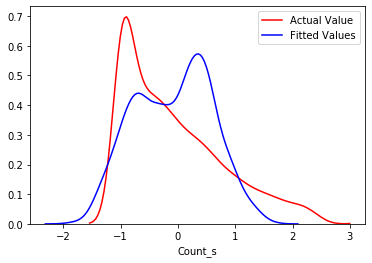

In [34]:
#Plotting actual vs predicted outputs
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

The first thing to note here is that co-efficient values are huge even though we get an acceptable RMSE. But let's re-run the model using cross-validation and see if it helps us acheive better results.

# Regression using Cross-Validation

In [35]:
#Using cros validation-importing the libraries
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

#Applying it on the model now
scores = cross_val_score(model, X, y, cv=7)
print ("Cross val scores:",scores)

Cross val scores: [-1.1875049   0.57972909  0.61194794  0.42369965  0.5449597   0.54267842
  0.51665607]


In [37]:
#CV of 5 gives good results, so we will use that
# Make cross validated predictions
predictions = cross_val_predict(model, X, y, cv=5)

In [38]:
print ('The intercept is:',model.intercept_ , '\nThe coeff values are:', model.coef_)

The intercept is: -4268458437573.1934 
The coeff values are: [ 2.52206857e-01 -8.81525713e-02 -3.18195264e-02  7.21967793e+10
  7.21967793e+10  7.21967793e+10  7.21967793e+10  7.21967793e+10
  7.21967793e+10  7.21967793e+10  7.21967793e+10  7.21967793e+10
  7.21967793e+10  7.21967793e+10  7.21967793e+10  7.21967793e+10
  7.21967793e+10  7.21967793e+10  7.21967793e+10  7.21967793e+10
  7.21967793e+10  7.21967793e+10  7.21967793e+10  7.21967793e+10
  7.21967793e+10  7.21967793e+10  7.21967793e+10  3.88777631e+12
  3.88777631e+12 -1.42361754e+11 -1.42361754e+11 -1.42361754e+11
 -1.42361754e+11  4.50847106e+11  4.50847106e+11  4.50847106e+11
  4.50847106e+11]


In [39]:
#Let's check the RMSE
print (np.sqrt(metrics.mean_squared_error(y, predictions)))

0.6022063233429561


Even cross- validation doesn't show much improvement. Let's see what's happening here using another library called 'Statsmodel' that gives a nice detailed summary of the fitted model.

# Regression with Statsmodels

In [40]:
#using Statsmodels
import statsmodels.api as sm
X = sm.add_constant(X) # adding a constant
model2 = sm.OLS(y, X).fit()
predictions = model2.predict(X) 

print_model = model2.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                Count_s   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     804.9
Date:                Sun, 10 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:41:34   Log-Likelihood:                -12997.
No. Observations:               16874   AIC:                         2.607e+04
Df Residuals:                   16838   BIC:                         2.634e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

c:\users\rakbansal\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


As we saw earlier, the co-efficients are huge, the p-values are not significant and the adjusted R-squared doesn't explain the variance in the model.
Let's see if this is because of multicollinearity and check the Varinace Inflation Factor (VIF) of the features.
By a rule of thumb, any variable with VIF greater than 10 is prone to multicollinearity.

In [41]:
#Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
df= training_df
X = add_constant(df)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

c:\users\rakbansal\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


const                                                   0.000000e+00
Temp_s                                                  3.317569e+00
Humidity_s                                              1.810741e+00
Windspeed_s                                             1.164215e+00
Count_s                                                 2.673075e+00
hour_0                                                  5.414617e+06
hour_1                                                  1.291465e+06
hour_2                                                  8.926025e+07
hour_3                                                  9.842016e+08
hour_4                                                  4.513899e+05
hour_5                                                  4.639483e+08
hour_6                                                  4.666725e+10
hour_7                                                  2.457869e+05
hour_8                                                  1.051975e+09
hour_9                            

As expected, there is a lot of multicollinearity in the dataset and the model looks like it's overfitting. There are three ways to deal with overfitting:
1. Regularization
2. Bagging
3. Boosting

In this model,we will be testing two of these techniques- Regularization using 'Ridge Regression' and Bagging using 'Random Forests'.

# Ridge Regression

Ridge Regression can be used to make better predictions as it introduces a small amount of bias in the model. It penalizes huge coefficients by a factor called lambda.

In [42]:
#Import the library
from sklearn.linear_model import Ridge

#Instantiate the model
rr = Ridge(alpha=100)

#Train the model
rr.fit(X_train, y_train) 

#Predict and check RMSE
pred_test_rr= rr.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,pred_test_rr))) 


0.5436164496658877


In [43]:
#R-squared
print(metrics.r2_score(y_test, pred_test_rr))

0.6098918249676489


In [44]:
#Let's see if it solved the huge co-efficient problem
print ('The intercept is:',rr.intercept_ , '\nThe coeff values are:', rr.coef_)

The intercept is: -0.1283918774090986 
The coeff values are: [ 0.28601948 -0.13178739 -0.02171695 -0.49740693 -0.58283648 -0.60919522
 -0.64955875 -0.66192185 -0.58944844 -0.3197872   0.31345687  0.58231779
  0.24074691 -0.01630499  0.06747211  0.21181461  0.14086963  0.11200584
  0.14034121  0.43505685  0.79714864  0.70925803  0.54820555  0.18787761
 -0.01463619 -0.18548433 -0.35999128 -0.00168351  0.00168351  0.07444821
  0.00174525 -0.15309925  0.07690578 -0.09462143 -0.10223874  0.0304828
  0.16637737]


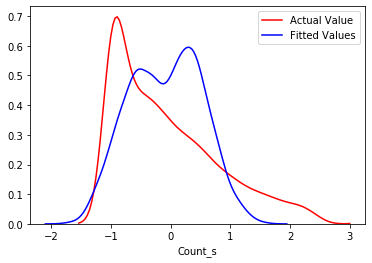

In [45]:
#Plotting actual vs predicted outputs
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(pred_test_rr, hist=False, color="b", label="Fitted Values" , ax=ax1)

# Random Forests

Ridge regression did a good job with dealing with the overfitting problem but it also introduced high bias and variance. 
Let's see if Random Forest can provide better results.

In [46]:
#Regression with Random Forest
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(n_estimators = 200)
rfreg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [47]:
#Make Predictions
pred= rfreg.predict(X_test)

#Check RMSE
print('RMSE:', np.sqrt(metrics.mean_squared_error((y_test),(pred))))

score = rfreg.score(X_test, pred)
print(score)

RMSE: 0.37835776372798674
1.0


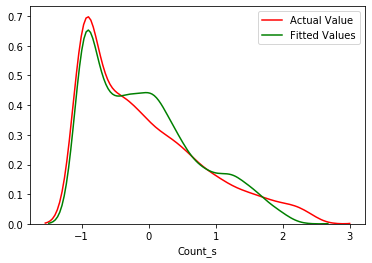

In [48]:
#Visualize the fitted vs original values
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(pred, hist=False, color="g", label="Fitted Values" , ax=ax1)